In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor

# import the necessary modules

In [ ]:
train_data = pd.read_csv('../main_dataset.csv')

In [8]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [ ]:
X = train_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Tsi - it same across all the experiments
y = train_data['Log_Id']

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle = True)

# model = XGBRegressor(subsample= 0.7, reg_lambda= 0, reg_alpha= 1, n_estimators= 500, min_child_weight= 5, max_depth= 7, learning_rate= 0.01, gamma= 0.1, colsample_bytree= 0.5)
# model.fit(X_train, y_train)

In [ ]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop
# trained model is copied to drive and downloaded
# importing the trained model 

import joblib 
model = joblib.load('xgboost_model.joblib')
model.score(X_train, y_train)

0.9973465448646829

In [13]:
y_pred_1 = model.predict(X_test)
print("r2_score = ", r2_score(y_pred_1, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred_1, y_test))

r2_score =  0.9972527927109098
mean_absolute_error =  0.16278885572203775


In [ ]:
# note :
# 1. Ignored - column - Nc
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [ ]:
# testing the model on the test data set 
#  importing the testt data

test_data = pd.read_csv('../test_data.csv')

In [ ]:
print(test_data[test_data['Vgs'] == 2].index.tolist()) # extracting the indices of end of each experiment 

[202, 405, 608, 811, 1014]


In [ ]:
test_data = test_data.iloc[0:203] # selecting the first experiment 
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   
202   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  2.000000   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3    5.430000e-19  
4    4.5200

In [ ]:
# preprocessing the data in the same way as training was did.

test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[[ 'Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [ ]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)


# predicting the Values
y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))
print("mean_absolute_error = ", mean_absolute_error(y_pred_test_1, y_test_1))

0.9959374741245175
mean_absolute_error =  0.1023874589131828


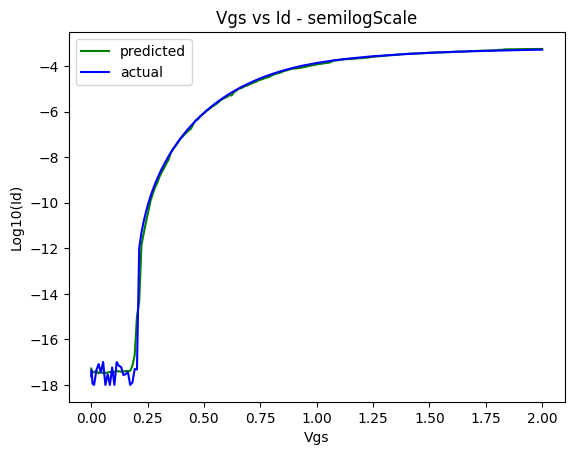

In [21]:
# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue", label="actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

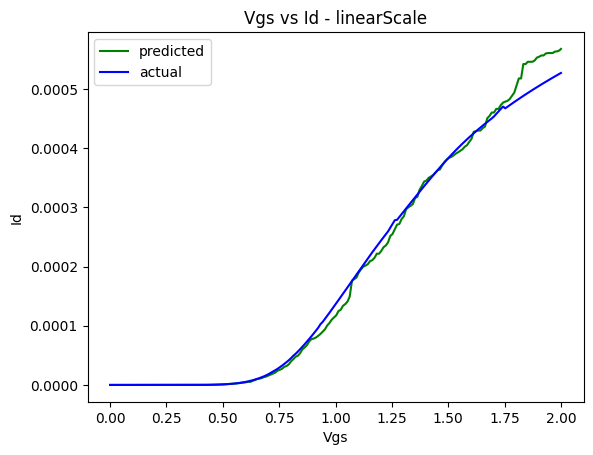

In [25]:
# plotting the data 

plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label="actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()

In [ ]:
# saving the trained model 

# import joblib 
# joblib.dump(model, "xg_boost_model.joblib")  


#loading the model 
# model = joblib.load("./path/modelname.joblib")